# 1. Financial market data
## 1.1 Stylized facts of financial market returns
### 1.1.1 Stylized facts for univariate series
   - Time series data of returns, in particular daily return series, are in general not independent and identically distributed (iid). This fact is not jeopardized by low absolute values of the first-order autocorrelation coefficient.
   - The volatility of return processes is not constant with respect to time.
   - The absolute or squared returns are highly autocorrelated.【也表明了volatility clustering的存在】
   - The distribution of financial market returns is leptokurtic. The occurrence of extreme events is more likely compared to the normal distribution.
   - Extreme returns are observed closely in time (volatility clustering).
   - The empirical distribution of returns is skewed to the left; negative returns are more likely to occur than positive ones.

Loading required package: timeDate
Loading required package: timeSeries


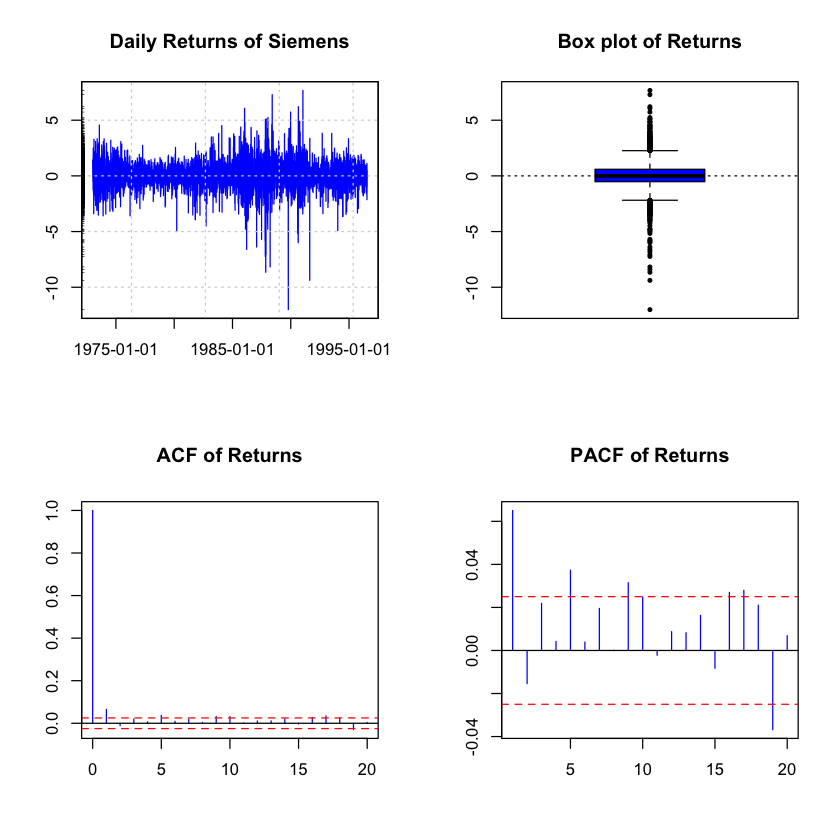

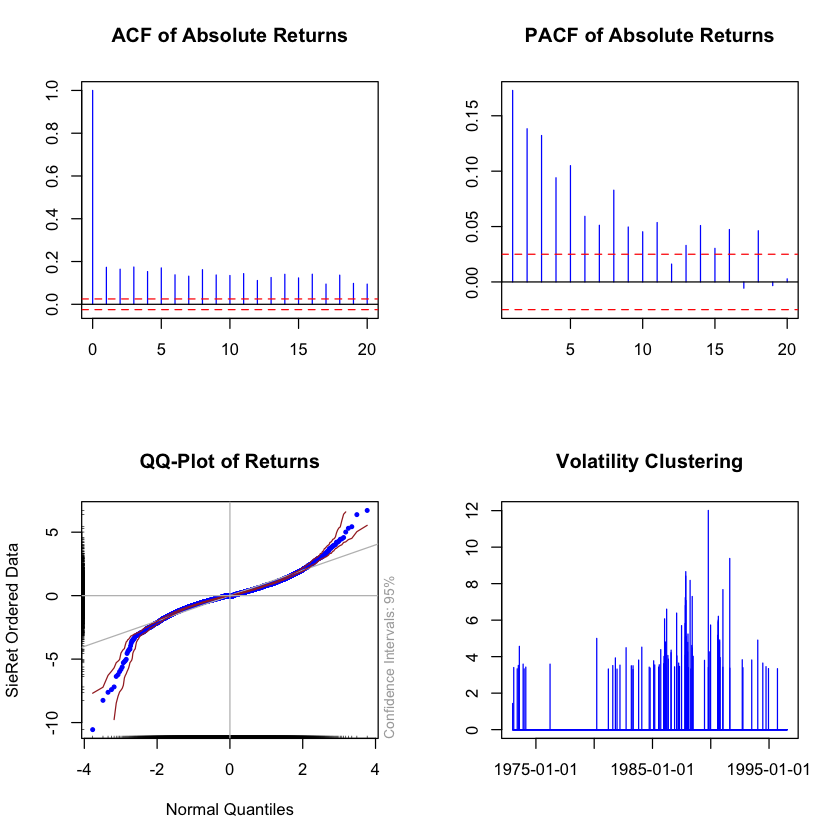

In [2]:
# Stylized facts on the returns for Siemens
library(fBasics)
library(evir)
data(siemens)
SieDates <- as.character(format(as.POSIXct(attr(siemens, "times")),
                                "%Y-%m-%d"))
SieRet <- timeSeries(siemens * 100, charvec = SieDates)
colnames(SieRet) <- "SieRet"
## Stylised Facts I
par(mfrow = c(2, 2))
seriesPlot(SieRet, title = FALSE, main = "Daily Returns of Siemens",
           col = "blue")
boxPlot(SieRet, title = FALSE, main = "Box plot of Returns",
        col = "blue", cex = 0.5, pch = 19)
acf(SieRet, main = "ACF of Returns", lag.max = 20, ylab = "",
    xlab = "", col = "blue", ci.col = "red")
pacf(SieRet, main = "PACF of Returns", lag.max = 20, ylab = "",
     xlab = "", col = "blue", ci.col = "red")
## Stylised Facts II
SieRetAbs <- abs(SieRet)
SieRet100 <- tail(sort(abs(series(SieRet))), 100)[1]
idx <- which(series(SieRetAbs) > SieRet100, arr.ind = TRUE)
SieRetAbs100 <- timeSeries(rep(0, length(SieRet)),
                           charvec = time(SieRet))
SieRetAbs100[idx, 1] <- SieRetAbs[idx]
acf(SieRetAbs, main = "ACF of Absolute Returns", lag.max = 20,
    ylab = "", xlab = "", col = "blue", ci.col = "red")
pacf(SieRetAbs, main = "PACF of Absolute Returns", lag.max = 20,
     ylab = "", xlab = "", col = "blue", ci.col = "red")
qqnormPlot(SieRet, main = "QQ-Plot of Returns", title = FALSE,
           col = "blue", cex = 0.5, pch = 19)
plot(SieRetAbs100, type = "h", main = "Volatility Clustering",
     ylab = "", xlab = "", col = "blue")


### 1.1.2 Stylized facts for multivariate series
* The absolute value of cross-correlations between return series is less pronounced and contemporaneous correlations are in general the strongest.
* In contrast, the absolute or squared returns do show high cross-correlations. This empirical finding is similar to the univariate case.
* Contemporaneous correlations are not constant over time.
* Extreme observations in one return series are often accompanied by extremes in the other return series.


Attaching package: ‘zoo’

The following object is masked from ‘package:timeSeries’:

    time<-

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



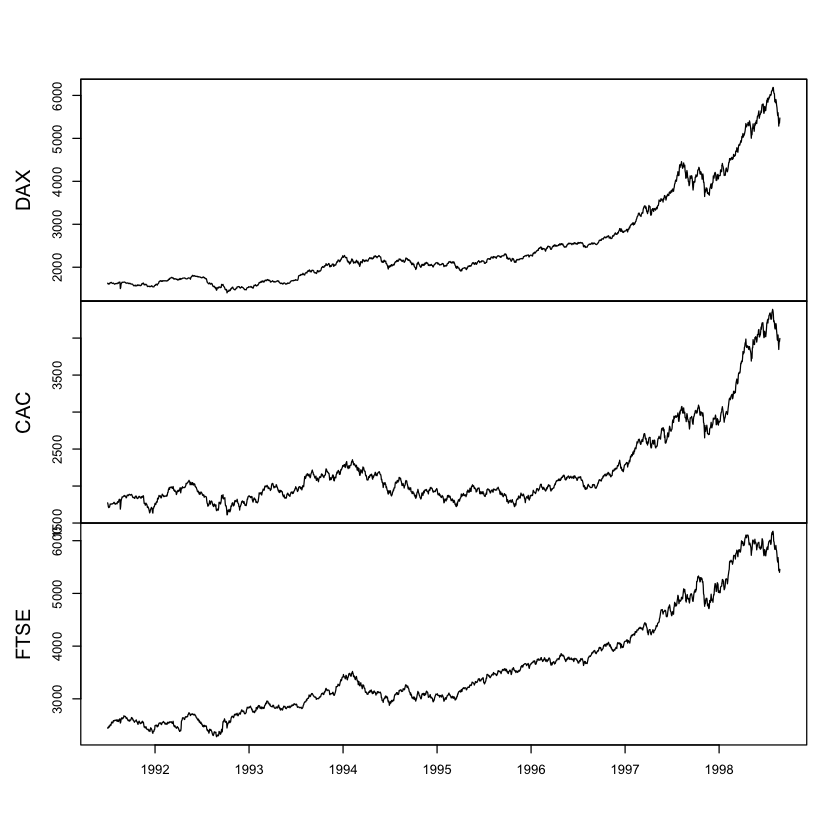

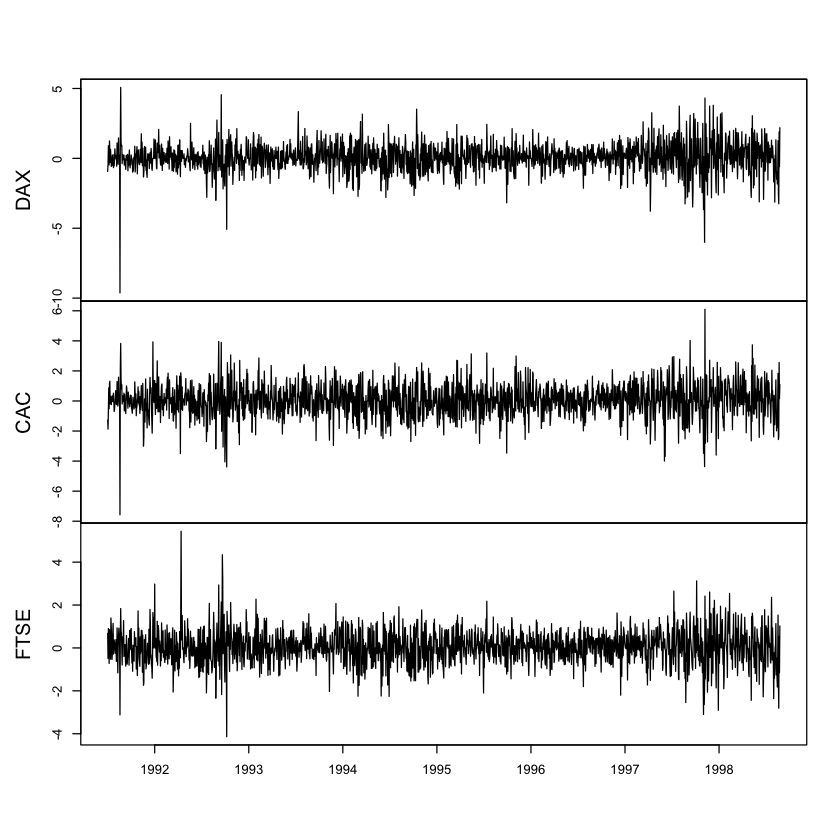

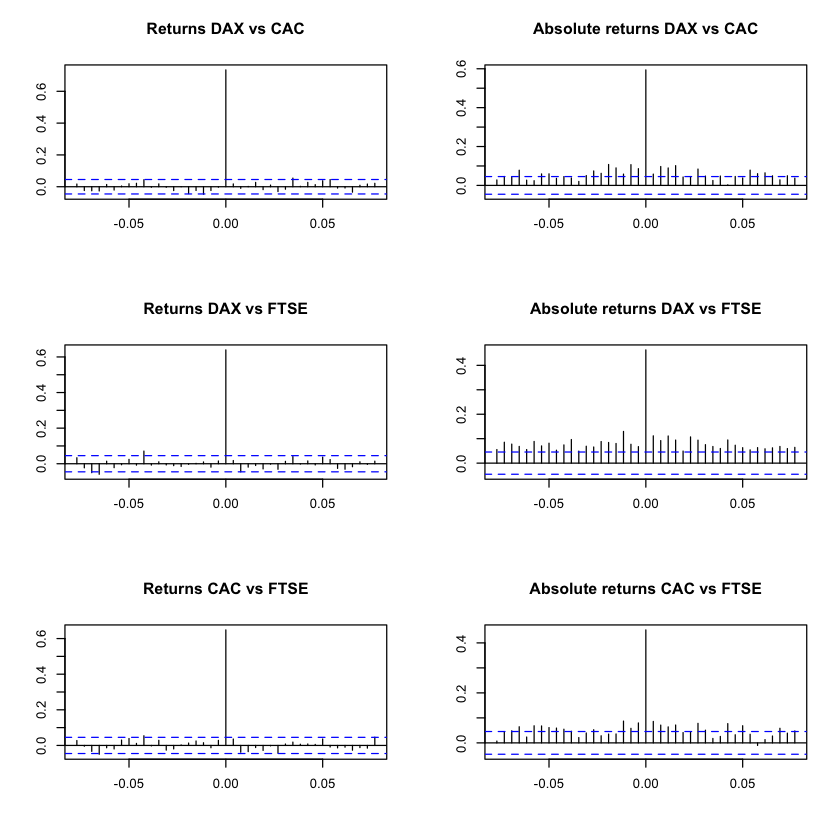

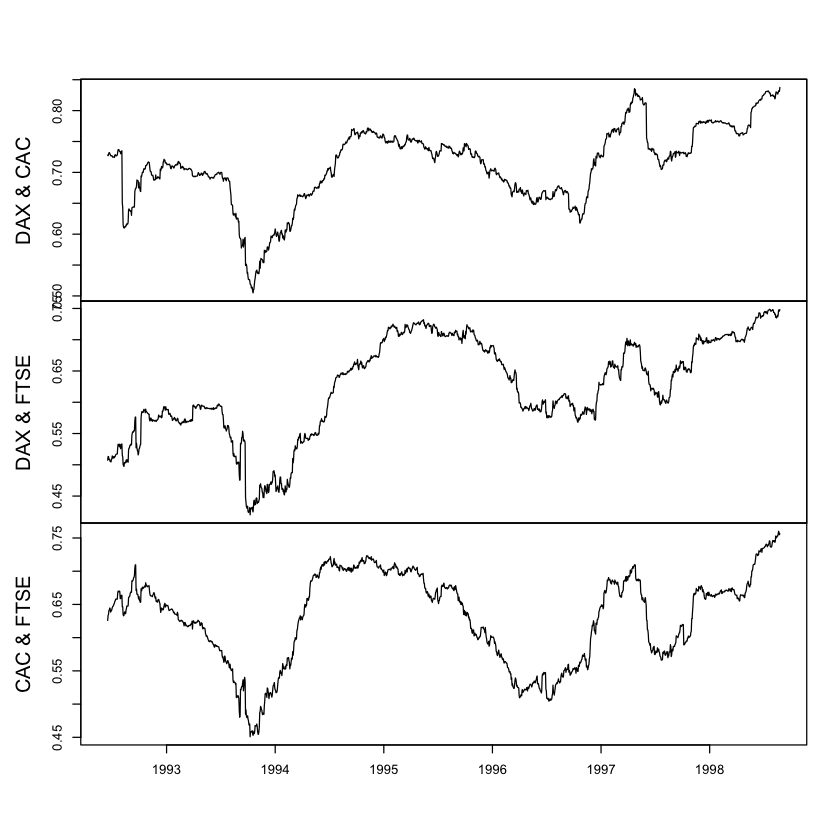

In [3]:
# Stylized facts on the European equity market.
library(zoo)
data(EuStockMarkets)
## Time Series plot of Levels
EuStockLevel <- as.zoo(EuStockMarkets)[, c("DAX", "CAC", "FTSE")]
plot(EuStockLevel, xlab = "", main = "")
## Perecntage returns
EuStockRet <- diff(log(EuStockLevel)) * 100
plot(EuStockRet, xlab = "", main = "")
## Cross correlations
layout(matrix(1:6, nrow = 3, ncol = 2, byrow = TRUE))
ccf(EuStockRet[, 1], EuStockRet[, 2], ylab = "", xlab = "",
    lag.max = 20, main = "Returns DAX vs CAC")
ccf(abs(EuStockRet)[, 1], abs(EuStockRet)[, 2], ylab = "",
    xlab = "", lag.max = 20, main = "Absolute returns DAX vs CAC")
ccf(EuStockRet[, 1], EuStockRet[, 3], ylab = "", xlab = "",
    lag.max = 20, main = "Returns DAX vs FTSE")
ccf(abs(EuStockRet)[, 1], abs(EuStockRet)[, 3], ylab = "",
    xlab = "", lag.max = 20, main = "Absolute returns DAX vs FTSE")
ccf(EuStockRet[, 2], EuStockRet[, 3], ylab = "", xlab = "",
    lag.max = 20, main = "Returns CAC vs FTSE")
ccf(abs(EuStockRet)[, 2], abs(EuStockRet)[, 3], ylab = "",
    xlab = "", lag.max = 20, main = "Absolute returns CAC vs FTSE")
## Rolling correlations
rollc <- function(x){
  dim <- ncol(x) # “列”数
  rcor <- cor(x)[lower.tri(diag(dim), diag = FALSE)] # cor(EuStockRet)[lower.tri(diag(3), diag = FALSE)] ; upper.tri(diag(3))
  return(rcor)
}
rcor <- rollapply(EuStockRet, width = 250, rollc,
                  align = "right", by.column = FALSE)
colnames(rcor) <- c("DAX & CAC", "DAX & FTSE", "CAC & FTSE")
plot(rcor, main = "", xlab = "")


# 2. Returns
## 2.1 Log Returns V.S. Net Returns
* log returns are approximately equal to net returns because if x is small, then $log(1+x)\approx x$

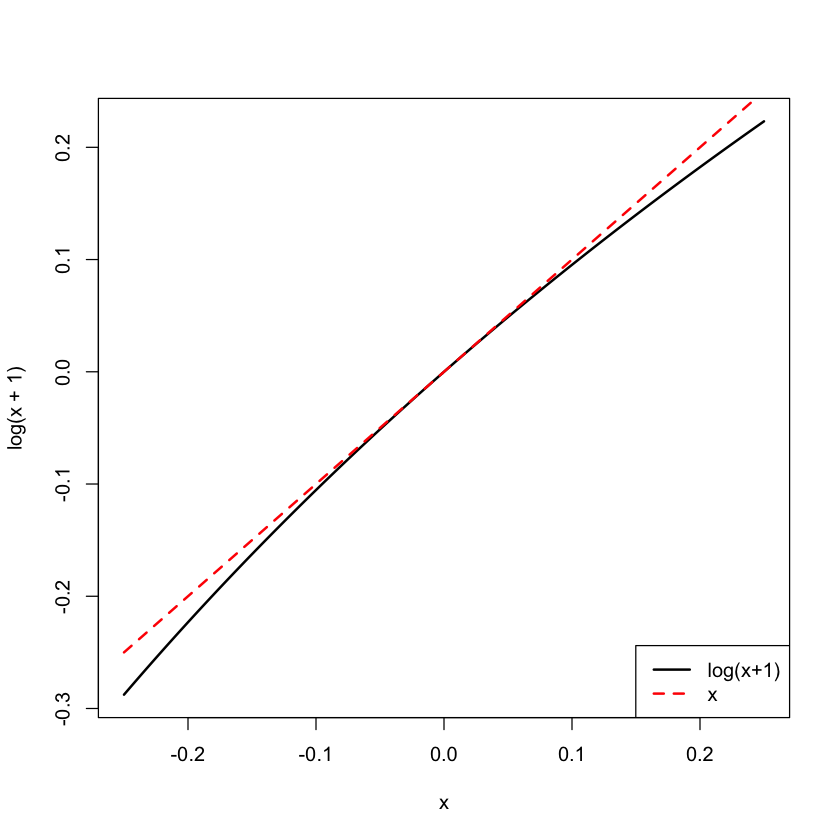

In [4]:
# log(1+x)～x
x= seq(-.25,.25,length=200)
plot(x,log(x+1),type="l",lwd=2)
lines(x,x,lty=2,lwd=2,col="red")
legend("bottomright",c("log(x+1)","x"),lty=c(1,2),lwd=2,col=c("black","red"))

## 2.2 Are Log Prices a Lognormal Geometric Random Walk?
* the answer is ___NO___. The lognormal geometric random walk makes two assumptions:
  1. the log returns are normally distributed;
  2. the log returns are mutually independent.
  
  然而，现实的log returns虽然也呈现“钟形”(bell shape)，但是具有“厚尾”特征（事实上，它更像是自由度为4-6的t分布）

## 2.3 R-Lab
### 2.3.1 Data Analysis

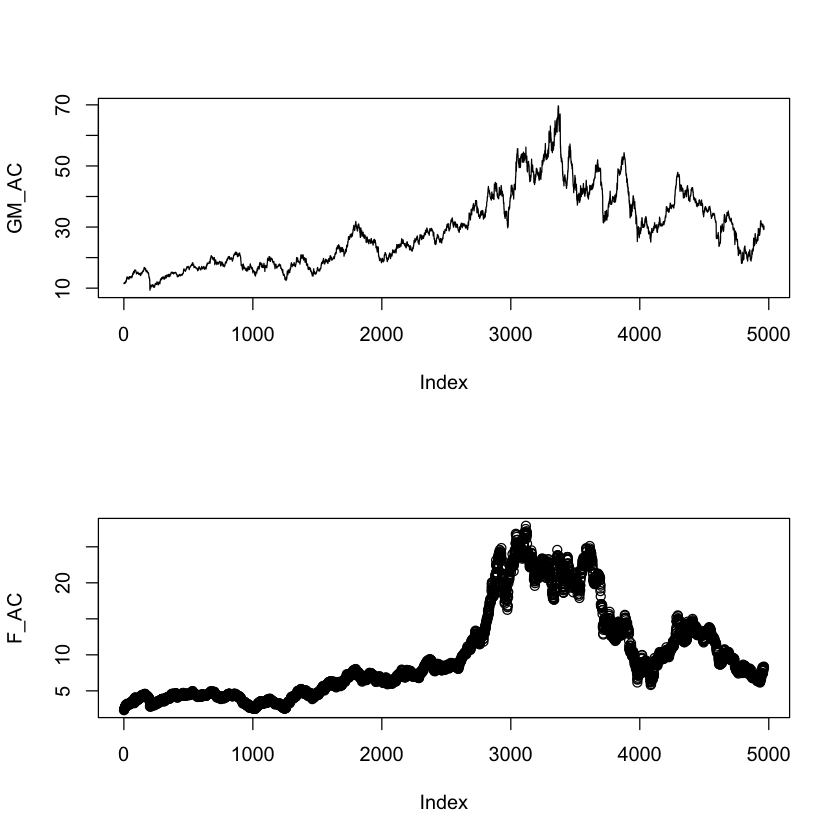

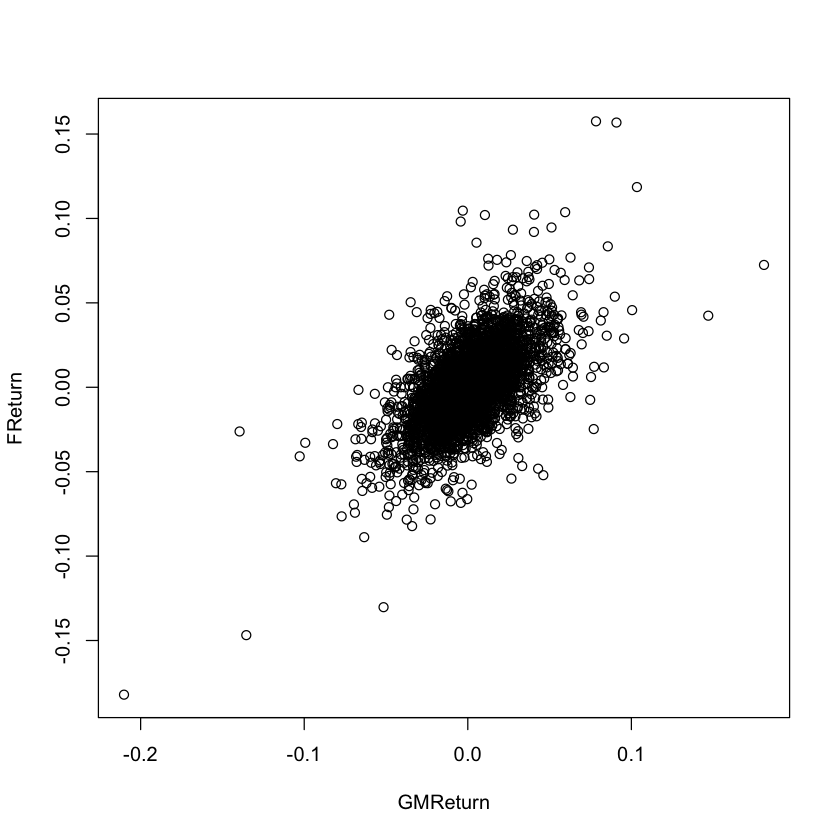

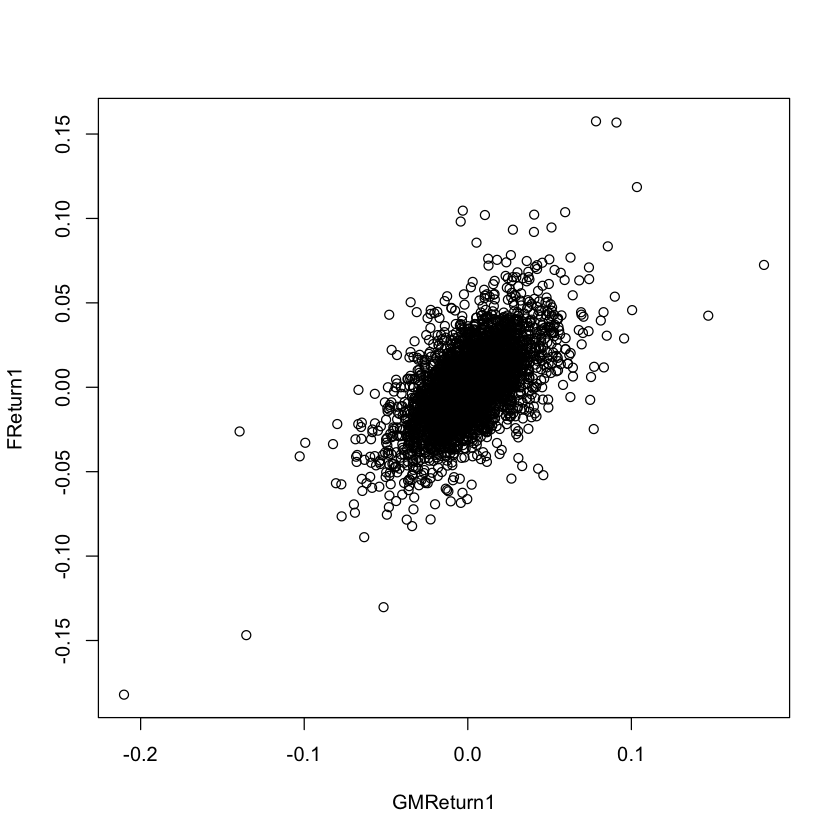

In [5]:
# ===
dat = read.csv("/Users/harbes/data/SDAFE/Stock_bond.csv",header=TRUE)
#names(dat)
attach(dat)
par(mfrow=c(2,1))
plot(GM_AC,type="l")
plot(F_AC) # 默认 type="o"
# ===
n = dim(dat)[1]
GMReturn = GM_AC[2:n]/GM_AC[1:(n-1)] - 1 # 计算 returns（net returns）
FReturn = F_AC[2:n]/F_AC[1:(n-1)] - 1 
GMReturn1 = GM_AC[-1]/GM_AC[-n]-1 # 计算returns的另一种方式
FReturn1 = F_AC[-1]/F_AC[-n]-1
par(mfrow=c(1,1))
plot(GMReturn,FReturn)
plot(GMReturn1,FReturn1)


Call:
lm(formula = GMReturn ~ FReturn)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.123889 -0.008965 -0.000358  0.008338  0.137369 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0001211  0.0002314   0.523    0.601    
FReturn     0.6014628  0.0109805  54.776   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01629 on 4960 degrees of freedom
Multiple R-squared:  0.3769,	Adjusted R-squared:  0.3768 
F-statistic:  3000 on 1 and 4960 DF,  p-value: < 2.2e-16


[1] 0.6139335


Call:
lm(formula = GMReturn2 ~ FReturn2)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.134243 -0.008887 -0.000248  0.008469  0.124046 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.037e-05  2.308e-04   0.175    0.861    
FReturn2    6.052e-01  1.097e-02  55.192   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01626 on 4960 degrees of freedom
Multiple R-squared:  0.3805,	Adjusted R-squared:  0.3803 
F-statistic:  3046 on 1 and 4960 DF,  p-value: < 2.2e-16


[1] 0.6168255

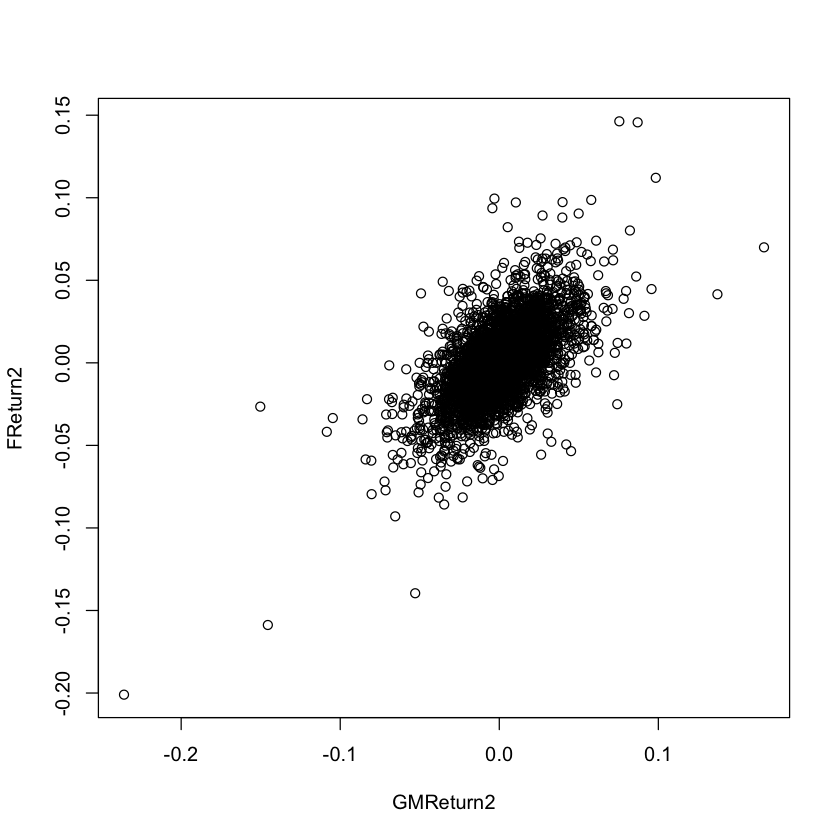

In [6]:
# GMReturn 与 FReturn 显著正相关
n = dim(dat)[1]
GMReturn = GM_AC[2:n]/GM_AC[1:(n-1)] - 1 # 计算 returns（net returns）
FReturn = F_AC[2:n]/F_AC[1:(n-1)] - 1
summary(lm(GMReturn~FReturn))
cor(GMReturn,FReturn)
# 对于 Log return
GMReturn2=log(GM_AC[-1])-log(GM_AC[-n])
FReturn2=log(F_AC[-1])-log(F_AC[-n])
par(mfrow=c(1,1))
plot(GMReturn2,FReturn2)
summary(lm(GMReturn2~FReturn2))
cor(GMReturn2,FReturn2)

[1] 0.271

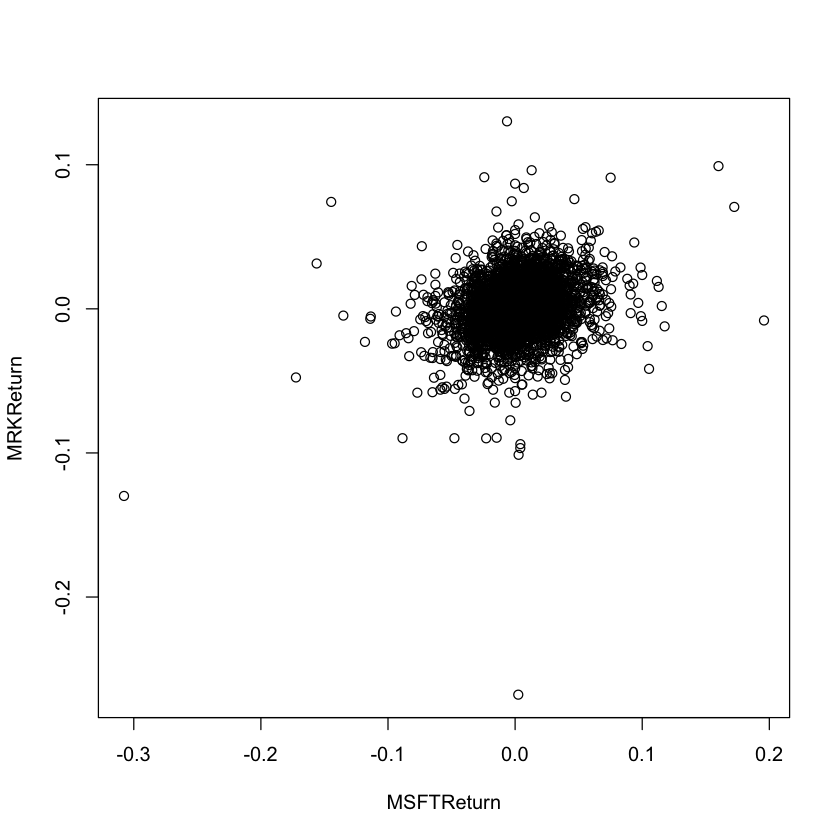

In [7]:
# Microsoft(MSFT) Versus Merck(MRK)
MSFTReturn = MSFT_AC[-1]/MSFT_AC[-n] - 1
MRKReturn = MRK_AC[-1]/MRK_AC[-n] - 1
plot(MSFTReturn,MRKReturn)
round(cor(MSFTReturn,MRKReturn),3)

### 2.3.2 Simulations: the effects of leverage in a simplified setting
* Suppose a hedge fund owns \$1,000,000 of stock and used \$50,000 of its own capital and \$950,000 in borrowed money for the purchase. Suppose that if the value of the stock falls below \$950,000 at the end of any trading day, then the hedge fund will sell all the stock and repay the loan. This will wipe out its \$50,000 investment. The hedge fund is said to be leveraged 20:1 since its position is 20 times the amount of its own capital invested. Suppose that the daily log returns on the stock have a mean of 0.05/year and a standard deviation of 0.23/year. These can be cnoverted to rates per trading day by dividing by 253 and $\sqrt{253}$, respectively.

In [1]:
## the probability that the value of the stock will be below $950,000 
## at the close of at least one of the next 45 trading days
# rm(list=ls(all=TRUE))
niter = 1e5 # number of iiteration
below = rep(0,niter) # set up storage
set.seed(2009)
options(warn=-1)
for (i in 1:niter)
{
  r = rnorm(45,mean=.05/253,sd=.23/sqrt(253))
  logPrice = log(1e6) + cumsum(r)
  minlogP = min(logPrice) # minimum price over next 45 days
  below[i] = as.numeric(minlogP < log(950000))
}
mean(below) # the proportion of simulations where the minimum price is less than 950,000

[1] 0.50988

In [19]:
# the expected return? 【over the next 100 days】
# When answering this question, remember that only $50,000 was invested. 
# Also, the units of return are time, e.g., one can express a return as a daily return or a weekly return. 
# Therefore, one must keep track of how long the hedge fund holds its position before selling.

niter = 1e5 # number of iiteration
ndays=50
#below = rep(0,niter) # set up storage
#r_cumsum=rep(0,niter)
profit=0
set.seed(2009)
options(warn=-1)
for (i in 1:niter)
{
  r = rnorm(ndays,mean=.05/253,sd=.23/sqrt(253))
  Price = exp(cumsum(r))-.95
  minP = min(Price) # minimum price over next N days
  profit=profit+ifelse(minP>0,Price,0)
}
profit/.05/niter/ndays*100
profit/.05/niter*100

[1] 1.00428

[1] 50.21402

NULL

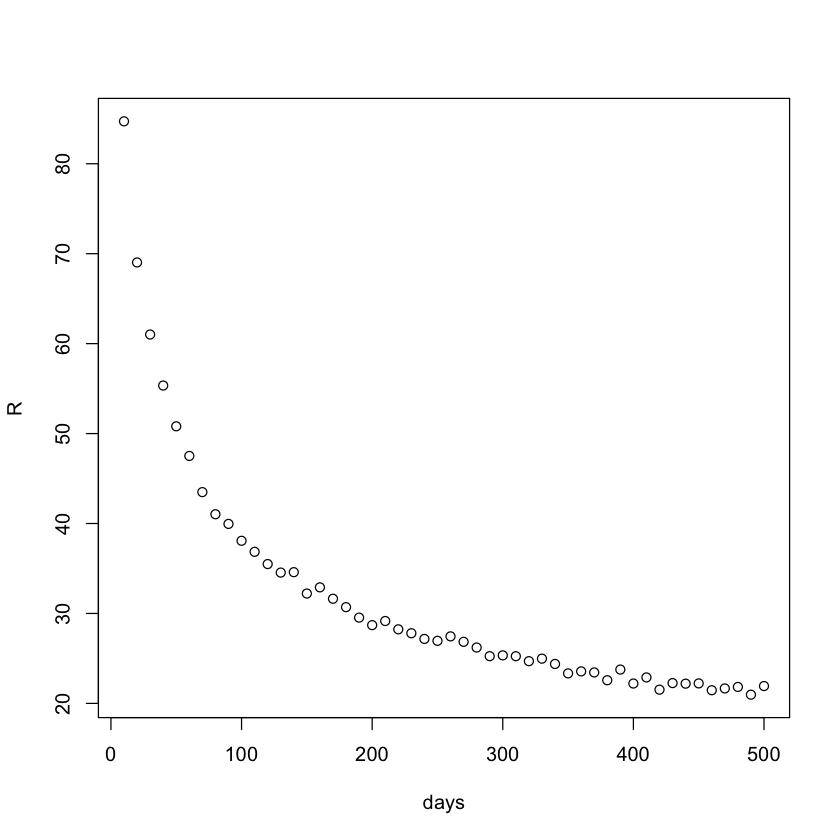

In [32]:
# profit 与 day 的关系
set.seed(2009)
options(warn=-1)
func<-function(niter,ndays){
profit=0
for (i in 1:niter)
{
  r = rnorm(ndays,mean=.05/253,sd=.23/sqrt(253))
  Price = exp(cumsum(r))-.95
  minP = min(Price) # minimum price over next N days
  profit=profit+ifelse(minP>0,Price,0)
}
profit/.05/niter*100
}
days=seq(10,500,10)
R=rep(0,length(days))
for (i in 1:length(days)){
    R[i]=func(1e3,days[i])}
par(c(1,1))
plot(days,R)

### 2.3.3 Simulating a Geometric Random Walk


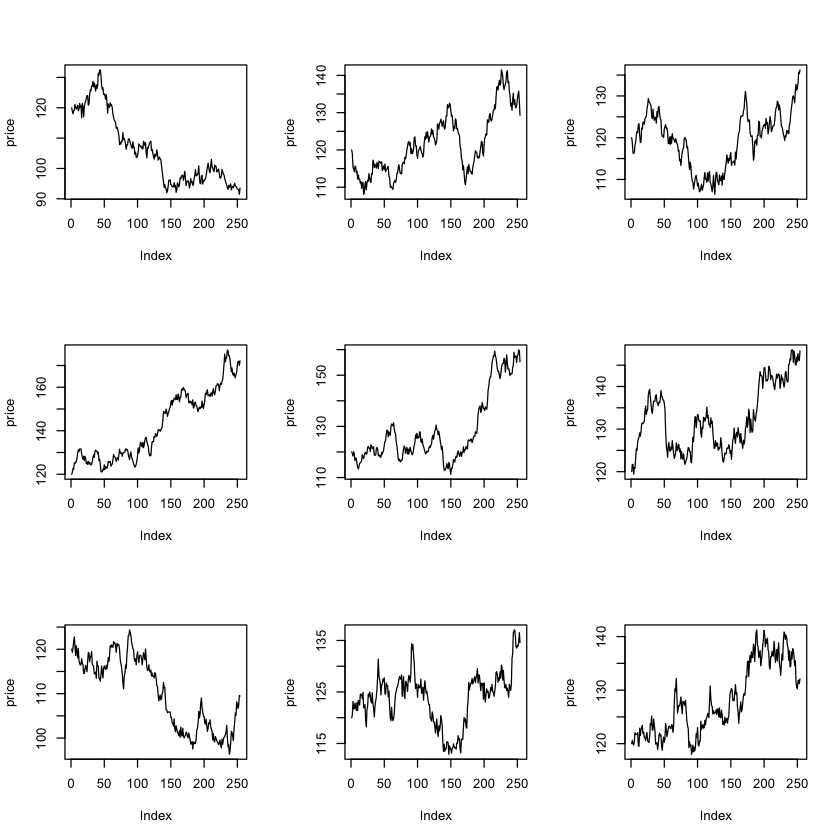

In [35]:
set.seed(2012)
n = 253
par(mfrow=c(3,3))
for (i in (1:9))
{
  logr = rnorm(n,0.05/253,0.2/sqrt(253))
  price = c(120,120*exp(cumsum(logr)))
  plot(price,type="l")
}

### 2.3.4 Let’s Look at McDonald’s Stock

Date,Open,High,Low,Close,Volume,Adj.Close
1/4/2010,62.63,63.07,62.31,62.78,5839300,53.99
1/5/2010,62.66,62.75,62.19,62.30,7099000,53.58
1/6/2010,62.20,62.41,61.06,61.45,10551300,52.85
1/7/2010,61.25,62.34,61.11,61.90,7517700,53.24
1/8/2010,62.27,62.41,61.60,61.84,6107300,53.19
1/11/2010,62.02,62.43,61.85,62.32,6081300,53.60



Call:
lm(formula = logReturn ~ Return)

Residuals:
      Min        1Q    Median        3Q       Max 
-1.03e-03  1.60e-06  2.76e-05  3.70e-05  3.97e-05 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.97e-05   2.51e-06   -15.8   <2e-16 ***
Return       1.00e+00   2.81e-04  3555.0   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.58e-05 on 1174 degrees of freedom
Multiple R-squared:     1,	Adjusted R-squared:     1 
F-statistic: 1.26e+07 on 1 and 1174 DF,  p-value: <2e-16


[1] -3.96926e-05

[1] 1.14817e-06

[1] -7.45223e-08

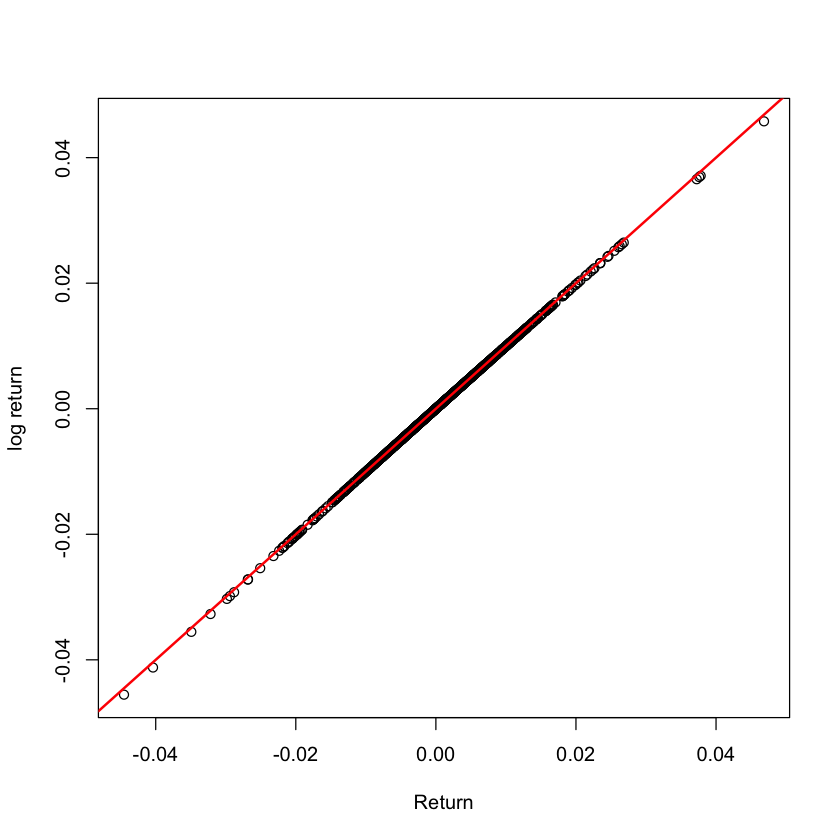

In [45]:
data = read.csv("/Users/harbes/data/SDAFE/MCD_PriceDaily.csv")
head(data)
adjPrice = data[,7]
# log return & return
logReturn = diff(log(adjPrice))
n = length(adjPrice)
Return = adjPrice[-1]/adjPrice[-n] - 1
summary(lm(logReturn~Return)) # R-squared:  0.9999 
plot(Return,logReturn,ylab = "log return")
abline(a = 0,b = 1,col = "red",lwd = 2)
# mean & deviation
mean(logReturn)-mean(Return) # 两种收益率数值有一定差距，尽管从绝对数值来看较小
sd(logReturn)-sd(Return) # 两种标准差近似
mean(logReturn)+ sd(logReturn)^2/2-mean(Return) # 这也就是“简单收益率转化为对数收益率时需要减去方差的一半”的原因
# a t-test to compare the means of the returns and the log returns. 【paired t-test】It is crucial to use a paired t-test because the return and log return on any given day are highly correlated and the independent samples t-test assumes that they are independent.
t.test(return,logReturn,paired = TRUE)
t.test(return,logReturn,paired = FALSE)
# a bet
niter = 10000
value = matrix(niter) 
set.seed(2015)
for (i in 1:niter) 
{
  logR = rnorm(20,mean = mean(logReturn),sd = sd(logReturn))
  prices = 93.07 * exp(cumsum(logR))
  ind = (min(prices) < 85)
value[i] = 100*ind - (1 - ind)
}
mu = mean(value)
mu
mu + c(-1,1)* sqrt(mu*(1-mu)/niter)*qnorm(0.975) # 95%置信区间【mu(1-mu)是value的方差】

[1] 0.0605

[1] 0.0558272 0.0651728